In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os


## 1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Exploratory Data Analysis.

In [5]:
#Import data
data = pd.read_csv('insurance_part2_data.csv')
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [6]:
#save a copy of the original data
df=data.copy()
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [7]:
#run preliminary checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [8]:
df.shape
print('The number of rows (observations) is:',df.shape[0],'\n''The number of columns(variables) is:',df.shape[1])

The number of rows (observations) is: 3000 
The number of columns(variables) is: 10


In [9]:
#checking duplicate lines
duplicate = df[df.duplicated()]
duplicate

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


As we are in presence of individuals and booking all around. It can happen that we can have the same characteristics in population and same insurance policies. So we decide to keep them


In [10]:
#checking missing data information
df.isnull().sum()


Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

the data doesn't include any missing information.

### checking of unique values in categorical fields

In [11]:
df.Agency_Code.unique()

array(['C2B', 'EPX', 'CWT', 'JZI'], dtype=object)

In [12]:
df.Type.unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [13]:
df.Claimed.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df.Channel.unique()

array(['Online', 'Offline'], dtype=object)

In [15]:
df['Product Name'].unique()

array(['Customised Plan', 'Cancellation Plan', 'Bronze Plan',
       'Silver Plan', 'Gold Plan'], dtype=object)

In [16]:
df.Destination.unique()

array(['ASIA', 'Americas', 'EUROPE'], dtype=object)

### Descriptive statistics

In [17]:
df.describe(include='all') .T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we have a negative number in field #Duration and a max duration  4580 days. Let check how many rows are concerned

In [18]:
df[((df['Duration']==-1)) ]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [19]:
df[((df['Duration']==4580)) ]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [20]:
#inputting the min and max duration with whisker plot lower and upper side
# IQR Calculation
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
# Whisker lower and upper sides calculation
whisker_l  = max(1, Q1 - 1.5 * IQR)
whisker_u  = Q3 + 1.5 * IQR  
print (Q1)
print (Q3)
print(IQR)
print(whisker_l)
print(whisker_u)

11.0
63.0
52.0
1
141.0


In [21]:
#Affecting the upper whisker to duration = 4580
df.iloc[2845, df.columns.get_loc('Duration')]=whisker_u
df.iloc[2845, df.columns.get_loc('Duration')]

141.0

In [22]:
#Affecting the lower whisker to duration = -1
df.iloc[1508, df.columns.get_loc('Duration')]=whisker_l
df.iloc[1508, df.columns.get_loc('Duration')]

1.0

In [23]:
#Final statistics
df.describe(include='all') .T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,68.522333,105.770506,0.0,11.0,26.5,63.0,466.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Validate true happening sales : 
df['SalesYN']=np.where(df['Sales']== 0, "No Sales", "Sales")
df[((df['Sales']==0)) ]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination,SalesYN
131,53,JZI,Airlines,No,12.95,Online,93.0,0.0,Bronze Plan,ASIA,No Sales
162,36,EPX,Travel Agency,No,0.00,Online,2.0,0.0,Customised Plan,ASIA,No Sales
323,54,CWT,Travel Agency,No,100.98,Online,18.0,0.0,Customised Plan,Americas,No Sales
483,44,CWT,Travel Agency,No,11.88,Online,10.0,0.0,Customised Plan,ASIA,No Sales
513,31,CWT,Travel Agency,No,83.16,Online,99.0,0.0,Customised Plan,EUROPE,No Sales
537,34,CWT,Travel Agency,No,11.88,Online,45.0,0.0,Customised Plan,ASIA,No Sales
612,33,CWT,Travel Agency,No,17.82,Online,4.0,0.0,Customised Plan,ASIA,No Sales
646,31,CWT,Travel Agency,No,11.88,Online,144.0,0.0,Customised Plan,ASIA,No Sales
703,30,JZI,Airlines,No,7.70,Online,9.0,0.0,Bronze Plan,ASIA,No Sales
766,36,EPX,Travel Agency,No,0.00,Online,7.0,0.0,Cancellation Plan,ASIA,No Sales


### Univariate analysis

#### Categorical Fields 

In [25]:
##### Define Function for univariate analysis of categorical variables

In [26]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df[cat_column].value_counts())
    fig_dims=(15,20)
    sns.countplot(x=cat_column, data=df, palette='pastel')
    plt.show()
    print("       ")

In [27]:
df_cat = df.select_dtypes(include = ['object']) 
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Agency_Code',
 'Type',
 'Claimed',
 'Channel',
 'Product Name',
 'Destination',
 'SalesYN']

Details of Agency_Code
----------------------------------------------------------------
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


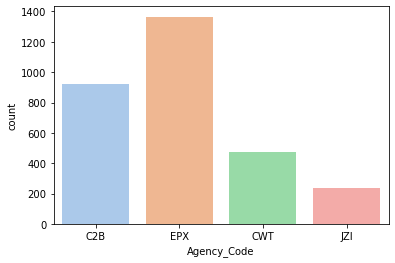

       
Details of Type
----------------------------------------------------------------
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


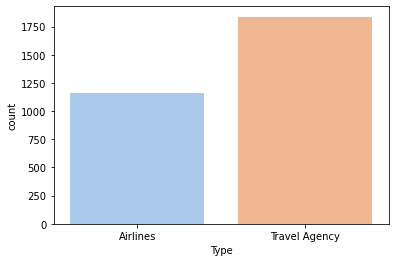

       
Details of Claimed
----------------------------------------------------------------
No     2076
Yes     924
Name: Claimed, dtype: int64


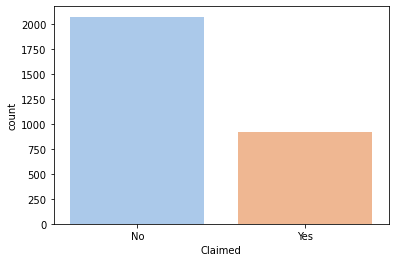

       
Details of Channel
----------------------------------------------------------------
Online     2954
Offline      46
Name: Channel, dtype: int64


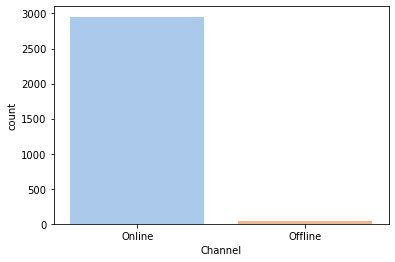

       
Details of Product Name
----------------------------------------------------------------
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


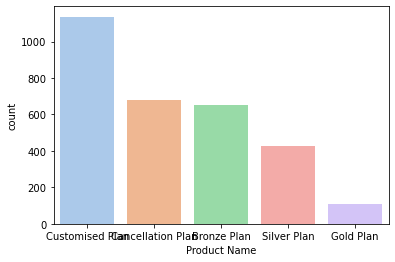

       
Details of Destination
----------------------------------------------------------------
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


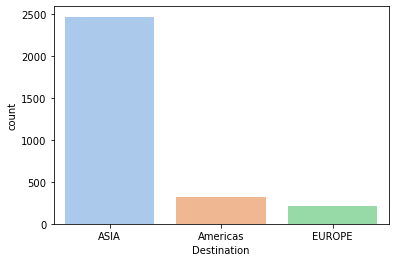

       
Details of SalesYN
----------------------------------------------------------------
Sales       2947
No Sales      53
Name: SalesYN, dtype: int64


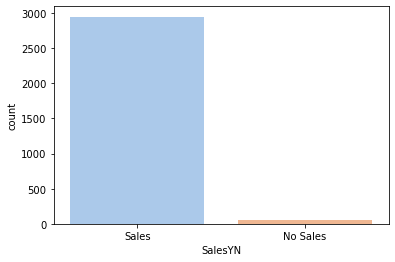

In [28]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

#### Numerical Fields

<AxesSubplot:>

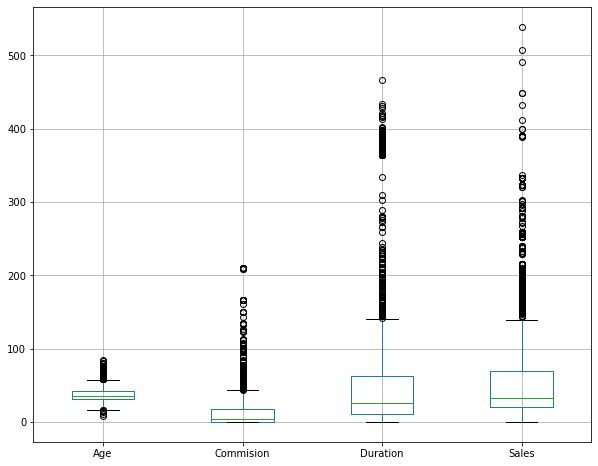

In [29]:
plt.figure(figsize=(10,8))
df.boxplot()

# 

## Bivariate Analysis

### Categorical & Categorical

Claimed     No  Yes
SalesYN            
No Sales    53    0
Sales     2023  924


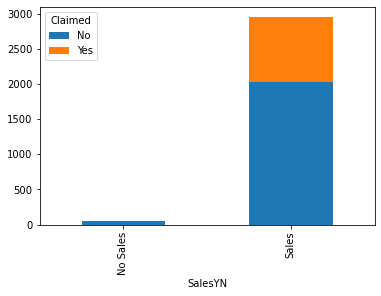

In [30]:
cl=pd.crosstab( df['SalesYN'], df.Claimed, margins= False )
cl.plot(kind='bar',stacked=True)
print(cl)

Claimed         No    Yes
Agency_Code              
C2B          39.39  60.61
CWT          70.13  29.87
EPX          85.86  14.14
JZI          87.45  12.55


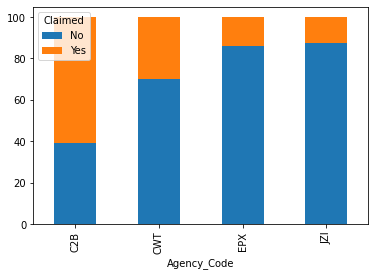

In [31]:
ag = pd.crosstab(df.Agency_Code, df.Claimed, normalize='index').round(4)*100
ag.plot(kind='bar',stacked=True)
print (ag)

In [32]:
pd.crosstab( df['Product Name'], df.Claimed, margins=True, normalize='index')

Claimed,No,Yes
Product Name,,
Bronze Plan,0.613846,0.386154
Cancellation Plan,0.936578,0.063422
Customised Plan,0.776408,0.223592
Gold Plan,0.357798,0.642202
Silver Plan,0.283372,0.716628
All,0.692000,0.308000


Claimed               No    Yes
Product Name                   
Bronze Plan        61.38  38.62
Cancellation Plan  93.66   6.34
Customised Plan    77.64  22.36
Gold Plan          35.78  64.22
Silver Plan        28.34  71.66


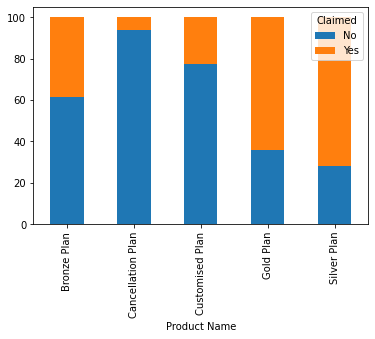

In [33]:
pn=pd.crosstab( df['Product Name'], df.Claimed, margins= False, normalize='index').round(4)*100
pn.plot(kind='bar',stacked=True)
print(pn)

Claimed           No    Yes
Type                       
Airlines       49.27  50.73
Travel Agency  81.82  18.18


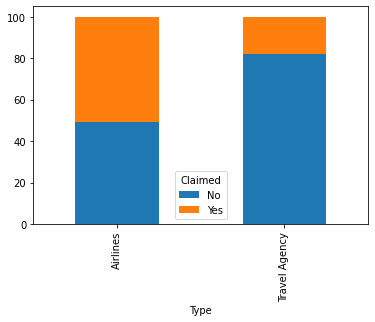

In [34]:
type=pd.crosstab( df.Type,df.Claimed, normalize='index').round(4)*100
type.plot(kind='bar',stacked=True)
print(type)

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

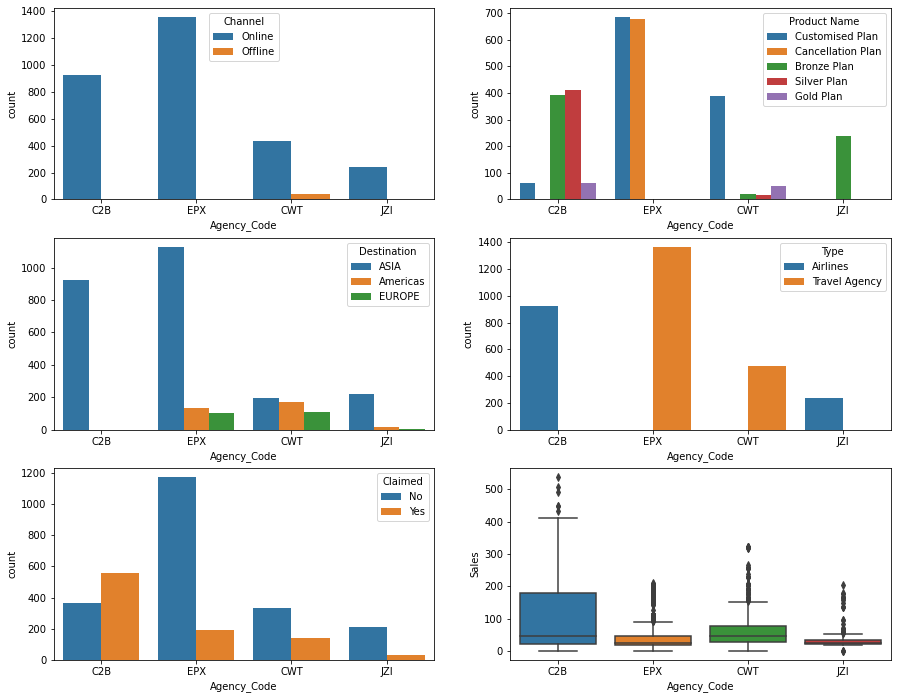

In [35]:
fig_dims = (15, 12)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=fig_dims)
sns.countplot(df['Agency_Code'],hue=df['Channel'],ax=axs[0,0])
sns.countplot(df['Agency_Code'],hue=df['Product Name'],ax=axs[0,1])
sns.countplot(df['Agency_Code'],hue=df['Destination'],ax=axs[1,0])
sns.countplot(df['Agency_Code'],hue=df['Type'],ax=axs[1,1]);
sns.countplot(df['Agency_Code'],hue=df['Claimed'],ax=axs[2,0])
sns.boxplot(x=df['Agency_Code'],y=df['Sales'],ax=axs[2,1])

### Categorical & Numerical

Claimed         No  Yes
Agerange               
Less than 20    17   11
20-29          321  255
30-39         1192  393
40-49          306  138
50-59          145   76
60-69           78   35
70+             17   16


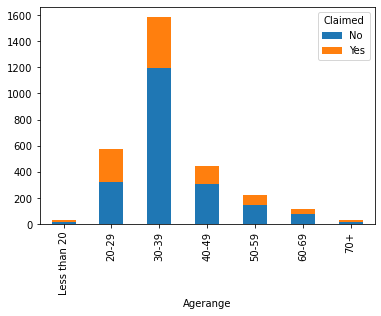

In [36]:
#Making Age range
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['Less than 20','20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
Age=pd.crosstab( df.Agerange,df.Claimed,margins= False)
Age.plot(kind='bar',stacked=True)
print(Age)

Comments	
Most  of the travelers are between 30  and 40 years and only 12% are claiming.
50% of people between 20 and 29y years are issuing claims.
Almost 33% beyond 40 years old are claiming 


<AxesSubplot:xlabel='Product Name'>

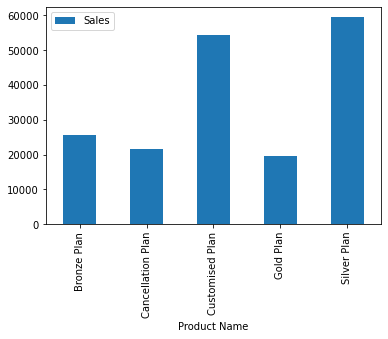

In [37]:
#Sales per plan
df.groupby(['Product Name']).sum().plot(kind='bar', y='Sales')

<AxesSubplot:xlabel='Claimed', ylabel='Duration'>

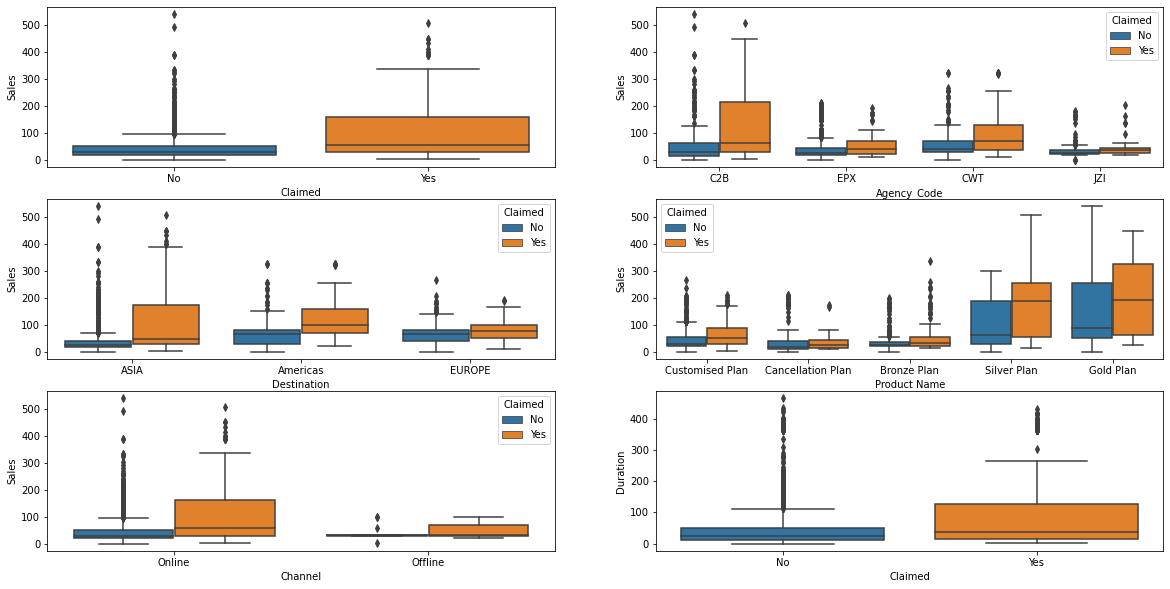

In [38]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=fig_dims) 
sns.boxplot(x=df['Claimed'],y=df['Sales'],ax=axs[0,0])
sns.boxplot(x=df['Agency_Code'],y=df['Sales'],hue=df['Claimed'],ax=axs[0,1])
sns.boxplot(x=df['Destination'],y=df['Sales'],hue=df['Claimed'],ax=axs[1,0])
sns.boxplot(x=df['Product Name'],y=df['Sales'],hue=df['Claimed'],ax=axs[1,1])
sns.boxplot(x=df['Channel'],y=df['Sales'],hue=df['Claimed'],ax=axs[2,0])
sns.boxplot(x=df['Claimed'],y=df['Duration'],ax=axs[2,1])


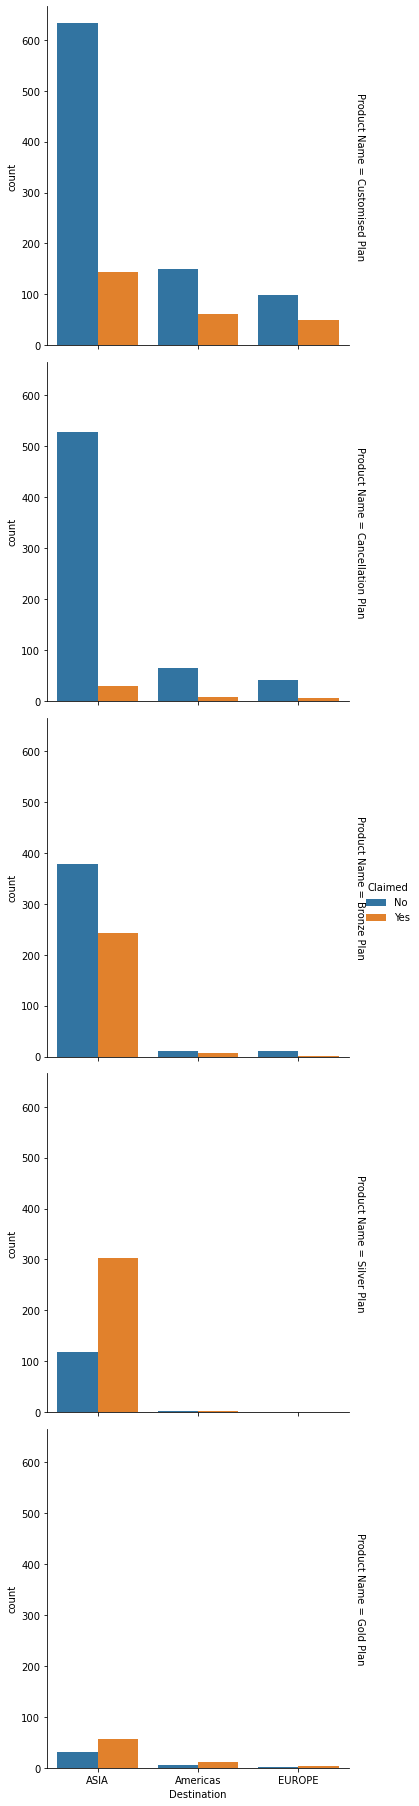

In [39]:
#Claim Analysis per Product Name and per Agency
sns.catplot(x="Destination",hue="Claimed",kind="count",row='Product Name', aspect=1,height=5,margin_titles=True,data=df)

#### Numerical & Numerical

### Data transformation

There are few variables which has the object data type.

Python does not take the input of object data types when building Classification Trees. So, we need to convert these variables into numerical variables.
The following code loops through each of the variable and converts the 'object' type variables to numerical variables by assigning ranks/numbers to each category.

In [40]:
for i in df.columns:#looping through all of the columns or variables
    if df[i].dtype == 'object': #checking if the data type of the variable is 'object'
        df[i] = pd.Categorical(df[i]).codes #converting the identified variable into Categorical and extracting the ranks

In [41]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination,SalesYN,Agerange
0,48,0,0,0,0.70,1,7.0,2.51,2,0,1,40-49
1,36,2,1,0,0.00,1,34.0,20.00,2,0,1,30-39
2,39,1,1,0,5.94,1,3.0,9.90,2,1,1,30-39
3,36,2,1,0,0.00,1,4.0,26.00,1,0,1,30-39
4,33,3,0,0,6.30,1,53.0,18.00,0,0,1,30-39
5,45,3,0,1,15.75,1,8.0,45.00,0,0,1,40-49
6,61,1,1,0,35.64,1,30.0,59.40,2,1,1,60-69
7,36,2,1,0,0.00,1,16.0,80.00,1,0,1,30-39
8,36,2,1,0,0.00,1,19.0,14.00,1,0,1,30-39
9,36,2,1,0,0.00,1,42.0,43.00,1,0,1,30-39


Now, we have converted these variables into numerical variables let us check the data frame and the data types of each variable.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           3000 non-null   int64   
 1   Agency_Code   3000 non-null   int8    
 2   Type          3000 non-null   int8    
 3   Claimed       3000 non-null   int8    
 4   Commision     3000 non-null   float64 
 5   Channel       3000 non-null   int8    
 6   Duration      3000 non-null   float64 
 7   Sales         3000 non-null   float64 
 8   Product Name  3000 non-null   int8    
 9   Destination   3000 non-null   int8    
 10  SalesYN       3000 non-null   int8    
 11  Agerange      3000 non-null   category
dtypes: category(1), float64(3), int64(1), int8(7)
memory usage: 117.7 KB


In [43]:
#dropping the columns "SalesYN" and #Age range
df=df.drop(df[["SalesYN","Agerange"]] , axis=1)
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


In [44]:
#Correlation calcultaion
corr=df.corr().round(2)
corr

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.00,0.02,-0.05,-0.03,0.07,-0.07,0.03,0.04,0.02,0.00
Agency_Code,0.02,1.00,0.55,-0.43,-0.39,0.02,-0.28,-0.35,-0.38,0.09
Type,-0.05,0.55,1.00,-0.34,-0.22,-0.10,-0.23,-0.25,-0.01,0.32
Claimed,-0.03,-0.43,-0.34,1.00,0.30,-0.02,0.28,0.35,0.26,-0.02
Commision,0.07,-0.39,-0.22,0.30,1.00,0.03,0.61,0.77,0.40,0.18
Channel,-0.07,0.02,-0.10,-0.02,0.03,1.00,-0.03,0.04,-0.04,0.04
Duration,0.03,-0.28,-0.23,0.28,0.61,-0.03,1.00,0.72,0.45,-0.02
Sales,0.04,-0.35,-0.25,0.35,0.77,0.04,0.72,1.00,0.47,0.09
Product Name,0.02,-0.38,-0.01,0.26,0.40,-0.04,0.45,0.47,1.00,0.02
Destination,0.00,0.09,0.32,-0.02,0.18,0.04,-0.02,0.09,0.02,1.00


<AxesSubplot:>

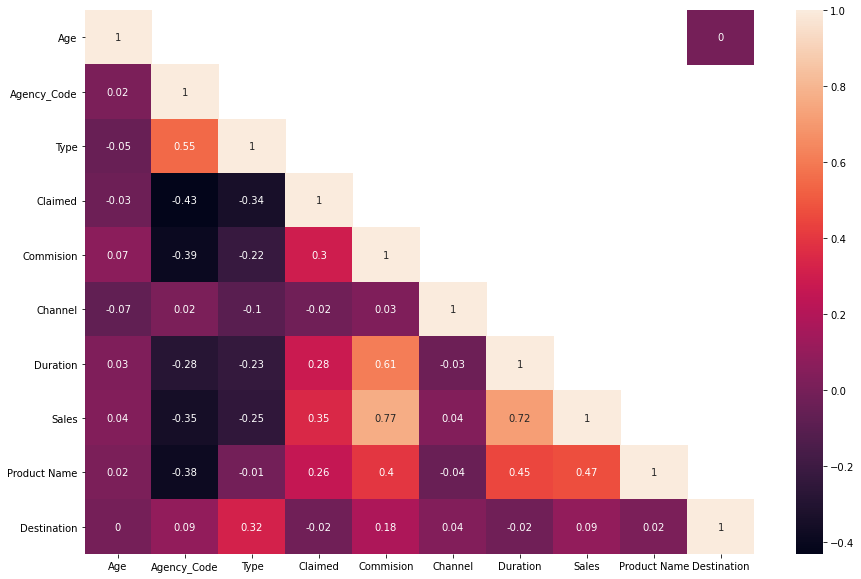

In [45]:
#Correlation Heatmap
fig_dims = (15, 10)
fig = plt.subplots(figsize=fig_dims)
#mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(corr, annot=True, mask=(np.triu(corr,+1)))

## 2) Data Split: Split the data into test(30% of the data) and train(70% of the data) Build the most optimum classification models : CART, Random Forest, Artificial Neural Network

# 3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

### Data split

In [46]:
#Identification of IV and DV
X = df.drop(df[["Claimed"]] , axis=1)

y = df.pop("Claimed")

In [47]:
# splitting data into training and test set for independent attributes. Test Size =30%
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Decision Tree Classifier

### Building the model

In [48]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [49]:
# Train Decision Tree Classifier
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [50]:
#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [51]:
from sklearn import tree

train_char_label = ['No', 'Yes']

In [52]:
#create the data that will save the node
dot_data = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names = list(X_train), class_names = list(train_char_label))

End of Tree Visualization
Let us check importance of the variables in the Classification Tree that we just built. The importance of a feature or variable is computed as the (normalized) total reduction of the gini criterion brought by that feature. It is also known as the Gini importance.

In [53]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration        0.263215
Sales           0.217707
Agency_Code     0.194770
Age             0.176571
Commision       0.084805
Product Name    0.038163
Destination     0.017507
Channel         0.007262
Type            0.000000
dtype: float64

From the above output, we can see that 'Duration' is the most important variable followed by Sales, 'Agency_Code', Age and so on.
Let us predict on the Training Data using the model that we just built.

In [54]:
dt_model.score(X_train,train_labels)

0.9947619047619047

In [55]:
dt_model.score(X_test,test_labels)

0.7188888888888889

The accuracy on the Training Data is 99.48% and the accuracy on the Test Data is 71.66%. The model has surely been overfitted. 
Thus, we need to prune or regularize the tree.

### Model Optimisation 

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9, 10],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [45, 60, 100]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [57]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [45, 60, 100]})

In [58]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 100}

 Redoing pruning by providing values closer to the previous values of 'max_depth', "min_samples_leaf" and 
    "min_samples_split"

In [59]:
#Trying with parameter : 'max_depth': [5,7,10],'min_samples_leaf': [5,10,15],'min_samples_split': [80,85,90]


param_grid = {
    'max_depth': [6,7],
    'min_samples_leaf': [5,10,15],
    'min_samples_split': [80,85,90]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3,n_jobs=-1)

In [60]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [6, 7], 'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [80, 85, 90]})

In [61]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 80}

In [62]:
#Trying with parameter : 'max_depth': [5,7,10],'min_samples_leaf': [5,10,15],'min_samples_split': [80,85,90]


param_grid = {
    'max_depth': [6,7],
    'min_samples_leaf': [7,10,12],
    'min_samples_split': [70,75,80]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3,n_jobs=-1)

In [63]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [6, 7], 'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [70, 75, 80]})

In [64]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 80}

  We see that the values are no longer changing. Hence the above values are our best paramters

In [65]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=80,
                       random_state=1)

In [66]:
#running the model
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [67]:
#extraction of probabilities
ytrain_predict_prob=best_grid.predict_proba(X_train)
ytest_predict_prob=best_grid.predict_proba(X_test)


#### Evaluation of the Decision Tree Model

In [68]:
# Print confusion matrix for the train data
print(metrics.confusion_matrix(train_labels,ytrain_predict))

[[1288  183]
 [ 238  391]]


In [69]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7995238095238095

In [70]:
tn, fp, fn, tp = metrics.confusion_matrix(train_labels,ytrain_predict).ravel()
print('True Negative:',tn,'\n''False Positive:' ,fp,'\n''False Negative:', fn,'\n''True Positive:', tp)
#set a dataframe
id=[0,1]
cf = pd.DataFrame ({'0':[tn,fn],
        '1':[fp,tp]},index=id)
cf

True Negative: 1288 
False Positive: 183 
False Negative: 238 
True Positive: 391


,0,1
0,1288,183
1,238,391


In [71]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.68      0.62      0.65       629

    accuracy                           0.80      2100
   macro avg       0.76      0.75      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [72]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
cartrain=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(cartrain.loc["1"][2],2)
cart_train_recall=round(cartrain.loc["1"][1],2)
cart_train_precision=round(cartrain.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.68
cart_train_recall  0.62
cart_train_f1  0.65


AUC (Area under the curve) is: 0.848


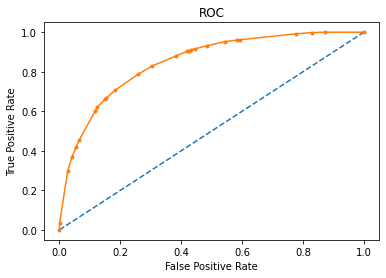

In [73]:
# AUC and ROC for the training data


# predict probabilities
probs = best_grid.predict_proba(X_train)
# calculating on the basis of a person not defaulting

# calculate AUC
cart_train_auc = metrics.roc_auc_score(train_labels,ytrain_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC (Area under the curve) is: %.3f' % cart_train_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = metrics.roc_curve(train_labels,ytrain_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

In [74]:
#Results from Test data

In [75]:
# Methode 2 Print confusion matrix
print(metrics.confusion_matrix(test_labels,ytest_predict))

[[546  59]
 [140 155]]


In [76]:
tn, fp, fn, tp = metrics.confusion_matrix(test_labels,ytest_predict).ravel()
print('True Negative:',tn,'\n''False Positive:' ,fp,'\n''False Negative:', fn,'\n''True Positive:', tp)

#set a Dataframe
id=[0,1]
cf = pd.DataFrame ({'0':[tn,fn],
        '1':[fp,tp]},index=id)
cf

True Negative: 546 
False Positive: 59 
False Negative: 140 
True Positive: 155


,0,1
0,546,59
1,140,155


In [77]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7788888888888889

In [78]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       605
           1       0.72      0.53      0.61       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.73       900
weighted avg       0.77      0.78      0.77       900



In [79]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
cartest=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(cartest.loc["1"][0],2)
cart_test_recall=round(cartest.loc["1"][1],2)
cart_test_f1=round(cartest.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.53
cart_test_f1  0.61


AUC(Area under the curve) is: 0.802


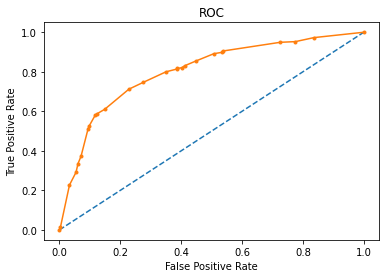

In [80]:
# AUC and ROC for the testing data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC(Area under the curve) is: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

## Random Forest

### Building the model

In [81]:
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True)
rfcl = rfcl.fit(X_train, train_labels)

In [82]:
#accuracy of the model
rfcl.oob_score_

0.7576190476190476

In [83]:
#Importance of features
pd.Series(rfcl.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration        0.254754
Sales           0.201943
Age             0.175771
Commision       0.131006
Agency_Code     0.103494
Product Name    0.082498
Type            0.023421
Destination     0.021389
Channel         0.005725
dtype: float64

In [84]:
rfcl = rfcl.fit(X_test, test_labels)

In [85]:
#accuracy of the model
rfcl.oob_score_

0.7433333333333333

In [86]:
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True,max_depth=10,max_features=9,min_samples_leaf=25,min_samples_split=75)
rfcl = rfcl.fit(X_train, train_labels)

In [87]:
rfcl.oob_score_

0.78

In [88]:
#Importance of features
pd.Series(rfcl.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Agency_Code     0.505389
Sales           0.229370
Product Name    0.085164
Duration        0.068938
Commision       0.055218
Age             0.050224
Destination     0.004617
Type            0.001080
Channel         0.000000
dtype: float64

In [89]:
rfcl = rfcl.fit(X_test, test_labels)

In [90]:
rfcl.oob_score_

0.7555555555555555

In [91]:
#creation of dictionnary
param_grid = {
    'max_depth': [7, 10], #number of level to which the tree has to be done
    'max_features': [5, 7, 9], # the total number of independant variables can use to splitting the decision nodes
    'min_samples_leaf': [40, 50],#how many observation need to be present in each decision tree
    'min_samples_split': [120, 150], #before each min decision tree to be present in decision before making the tree (3 times the leaf)
    'n_estimators': [301, 501]
    
}

In [92]:
rfcl = RandomForestClassifier()

In [93]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [94]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 7, 9],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [120, 150],
                         'n_estimators': [301, 501]})

In [95]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 120,
 'n_estimators': 301}

In [96]:
#trying another combination
#creation of dictionnary
param_grid = {
    'max_depth': [5,6,7,9], #number of level to which the tree has to be done
    'max_features': [5, 7], # the total number of independant variables can use to splitting the decision nodes
    'min_samples_leaf': [38, 40,45],#how many observation need to be present in each decision tree
    'min_samples_split': [120, 125,130], #before each min decision tree to be present in decision before making the tree (3 times the leaf)
    'n_estimators': [200, 250, 301, 350]
    
}

In [97]:
rfcl = RandomForestClassifier()

In [98]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [99]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9], 'max_features': [5, 7],
                         'min_samples_leaf': [38, 40, 45],
                         'min_samples_split': [120, 125, 130],
                         'n_estimators': [200, 250, 301, 350]})

In [100]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'max_depth': 6,
 'max_features': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 125,
 'n_estimators': 200}

In [101]:
#trying another combination
#creation of dictionnary
param_grid = {
    'max_depth': [6], #number of level to which the tree has to be done
    'max_features': [5], # the total number of independant variables can use to splitting the decision nodes
    'min_samples_leaf': [42, 43,45],#how many observation need to be present in each decision tree
    'min_samples_split': [100, 110,120], #before each min decision tree to be present in decision before making the tree (3 times the leaf)
    'n_estimators': [350, 400]
        
}

In [102]:
rfcl = RandomForestClassifier()

In [103]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [104]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6], 'max_features': [5],
                         'min_samples_leaf': [42, 43, 45],
                         'min_samples_split': [100, 110, 120],
                         'n_estimators': [350, 400]})

In [105]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 43,
 'min_samples_split': 110,
 'n_estimators': 350}

In [106]:
#creation of dictionnary
param_grid = {
    'max_depth': [6], #number of level to which the tree has to be done
    'max_features': [5], # the total number of independant variables can use to splitting the decision nodes
    'min_samples_leaf': [38, 40,42],#how many observation need to be present in each decision tree
    'min_samples_split': [90, 95,100], #before each min decision tree to be present in decision before making the tree (3 times the leaf)
    'n_estimators': [350,380,390, 400]
        
}

In [107]:
rfcl = RandomForestClassifier()

In [108]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [109]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6], 'max_features': [5],
                         'min_samples_leaf': [38, 40, 42],
                         'min_samples_split': [90, 95, 100],
                         'n_estimators': [350, 380, 390, 400]})

In [110]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 38,
 'min_samples_split': 100,
 'n_estimators': 380}

In [111]:
#creation of dictionnary
param_grid = {
    'max_depth': [6], #number of level to which the tree has to be done
    'max_features': [5], # the total number of independant variables can use to splitting the decision nodes
    'min_samples_leaf': [40],#how many observation need to be present in each decision tree
    'min_samples_split': [80, 85,90], #before each min decision tree to be present in decision before making the tree (3 times the leaf)
    'n_estimators': [360,370,380,385]
        
}

In [112]:
rfcl = RandomForestClassifier()

In [113]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [114]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6], 'max_features': [5],
                         'min_samples_leaf': [40],
                         'min_samples_split': [80, 85, 90],
                         'n_estimators': [360, 370, 380, 385]})

In [115]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 360}

In [116]:
#Importance of features
rfcl = rfcl.fit(X_train, train_labels)
pd.Series(rfcl.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration        0.255870
Sales           0.200332
Age             0.179978
Commision       0.118400
Agency_Code     0.100466
Product Name    0.093760
Type            0.024738
Destination     0.020344
Channel         0.006112
dtype: float64

In [117]:
#Using this best parameter we are going to extract the best estimators that we are going to make our prediction

best_grid=grid_search.best_estimator_

In [118]:
#running the model
ytrain_predict=best_grid.predict(X_train)
ytest_predict=best_grid.predict(X_test)

In [119]:
#extraction of probabilities
ytrain_predict_prob=best_grid.predict_proba(X_train)
ytest_predict_prob=best_grid.predict_proba(X_test)

#### Evaluation of RF Model

In [120]:
##Confusion matrix for the train data

In [121]:
confusion_matrix(train_labels,ytrain_predict)

array([[1329,  142],
       [ 273,  356]], dtype=int64)

In [122]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8023809523809524

In [123]:
tn, fp, fn, tp = metrics.confusion_matrix(train_labels,ytrain_predict).ravel()
print('True Negative:',tn,'\n''False Positive:' ,fp,'\n''False Negative:', fn,'\n''True Positive:', tp)
id=[0,1]
cf = pd.DataFrame ({'0':[tn,fn],
        '1':[fp,tp]},index=id)
cf

True Negative: 1329 
False Positive: 142 
False Negative: 273 
True Positive: 356


,0,1
0,1329,142
1,273,356


In [124]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [125]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
temp=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(temp.loc["1"][0],2)
rf_train_recall=round(temp.loc["1"][1],2)
rf_train_f1=round(temp.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.57
rf_train_f1  0.63


AUC: 0.842


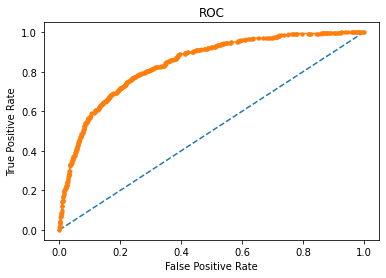

In [126]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

In [127]:
##test data

In [128]:
# Methode 2 Print confusion matrix
print(metrics.confusion_matrix(test_labels,ytest_predict))

[[553  52]
 [161 134]]


In [129]:
tn, fp, fn, tp = metrics.confusion_matrix(test_labels,ytest_predict).ravel()
print('True Negative:',tn,'\n''False Positive:' ,fp,'\n''False Negative:', fn,'\n''True Positive:', tp)

id=[0,1]
cf = pd.DataFrame ({'0':[tn,fn],
        '1':[fp,tp]},index=id)
cf

True Negative: 553 
False Positive: 52 
False Negative: 161 
True Positive: 134


,0,1
0,553,52
1,161,134


In [130]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7633333333333333

In [131]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       605
           1       0.72      0.45      0.56       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.75       900



In [132]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
rftest=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(rftest.loc["1"][0],2)
rf_test_recall=round(rftest.loc["1"][1],2)
rf_test_f1=round(rftest.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.45
rf_test_f1  0.56


AUC: 0.820


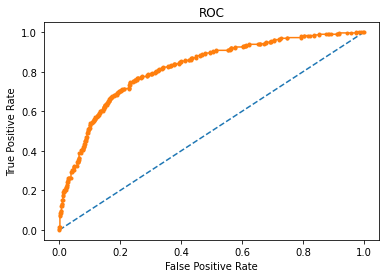

In [133]:
# AUC and ROC for the testing data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

The testing data is under performing than the training data

## MLP Classifier (Artificial Neural Network)

In [134]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [135]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [2500,5000,10000]
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [136]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [2500, 5000, 10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01]})

In [137]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.01}

In [138]:
#Prune
param_grid = {
    'hidden_layer_sizes': [(50,100,200)],
    'activation': ['relu'],
    'solver': ['adam'],
    'tol': [0.1,0.01],
    'max_iter' : [1000, 1500, 2000,2500]
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [139]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(50, 100, 200)],
                         'max_iter': [1000, 1500, 2000, 2500],
                         'solver': ['adam'], 'tol': [0.1, 0.01]})

In [140]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (50, 100, 200),
 'max_iter': 2500,
 'solver': 'adam',
 'tol': 0.01}

In [141]:
#Prune
param_grid = {
    'hidden_layer_sizes': [(70,100,150)],
    'activation': ['relu'],
    'solver': ['adam'],
    'tol': [0.1,0.01],
    'max_iter' : [5000,7500, 10000]
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [142]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(70, 100, 150)],
                         'max_iter': [5000, 7500, 10000], 'solver': ['adam'],
                         'tol': [0.1, 0.01]})

In [143]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (70, 100, 150),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [144]:
#Prune
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'tol': [0.01],
    'max_iter' : [7500, 10000]
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [145]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [7500, 10000], 'solver': ['adam'],
                         'tol': [0.01]})

In [146]:
#Extract the parameters that work better for our model
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [147]:
#Using this best parameter we are going to extract the best estimators that we are going to make our prediction
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, tol=0.01)

In [148]:
nncl.fit(X_train, train_labels)

MLPClassifier()

In [149]:
nncl.score(X_train, train_labels)

0.7619047619047619

In [150]:
nncl.get_params

<bound method BaseEstimator.get_params of MLPClassifier()>

In [151]:
#Running the model
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [152]:
#extraction of probabilities
ytrain_predict_prob=best_grid.predict_proba(X_trains)
ytest_predict_prob=best_grid.predict_proba(X_tests)

## Evaluation of ANN Model

### NN Model Performance Evaluation on Training data

In [153]:
# Methode 2 Print confusion matrix
print(metrics.confusion_matrix(train_labels,ytrain_predict))

[[1327  144]
 [ 302  327]]


In [154]:
tn, fp, fn, tp = metrics.confusion_matrix(train_labels,ytrain_predict).ravel()
print('True Negative:',tn,'\n''False Positive:' ,fp,'\n''False Negative:', fn,'\n''True Positive:', tp)

id=[0,1]
cf = pd.DataFrame ({'0':[tn,fn],
        '1':[fp,tp]},index=id)
cf

True Negative: 1327 
False Positive: 144 
False Negative: 302 
True Positive: 327


,0,1
0,1327,144
1,302,327


In [155]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.589047619047619

In [156]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1471
           1       0.69      0.52      0.59       629

    accuracy                           0.79      2100
   macro avg       0.75      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [157]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
nntrain=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(nntrain.loc["1"][0],2)
nn_train_recall=round(nntrain.loc["1"][1],2)
nn_train_f1=round(nntrain.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.52
nn_train_f1  0.59


AUC: 0.716


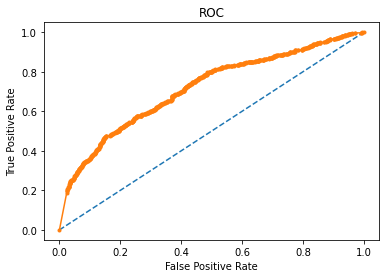

In [158]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % nn_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_train_fpr, nn_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

In [159]:
#Test data

In [160]:
# Methode 2 Print confusion matrix
print(metrics.confusion_matrix(test_labels,ytest_predict))

[[558  47]
 [169 126]]


In [161]:
tn, fp, fn, tp = metrics.confusion_matrix(test_labels,ytest_predict).ravel()
print('True Negative:',tn,'\n''False Positive:' ,fp,'\n''False Negative:', fn,'\n''True Positive:', tp)

id=[0,1]
cf = pd.DataFrame ({'0':[tn,fn],
        '1':[fp,tp]},index=id)
cf

True Negative: 558 
False Positive: 47 
False Negative: 169 
True Positive: 126


,0,1
0,558,47
1,169,126


In [162]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.6077777777777778

In [163]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.69       900
weighted avg       0.75      0.76      0.74       900



In [164]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
nntest=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(nntest.loc["1"][0],2)
nn_test_recall=round(nntest.loc["1"][1],2)
nn_test_f1=round(nntest.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.73
nn_test_recall  0.43
nn_test_f1  0.54


In [165]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.589047619047619

AUC: 0.710


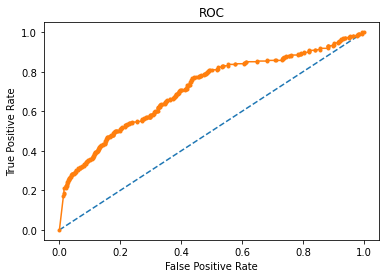

In [166]:
# AUC and ROC for the testing data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % nn_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_test_fpr, nn_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# show the plot
plt.show()

# Final Conclusion

## Comparison of the performance metrics from the 3 models 

In [167]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Summary = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
     'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(Summary,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.78,0.80,0.76,0.59,0.61
AUC,0.85,0.80,0.84,0.82,0.72,0.71
Recall,0.62,0.53,0.57,0.45,0.52,0.43
Precision,0.68,0.72,0.71,0.72,0.69,0.73
F1 Score,0.65,0.61,0.63,0.56,0.59,0.54


## ROC Curve for the 3 models on the Training data

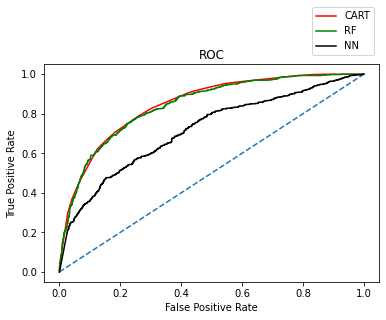

In [168]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

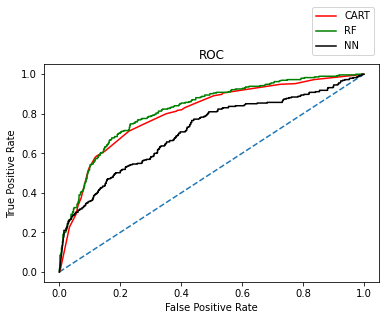

In [169]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the CART and RF models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable Duration is found to be the most useful feature amongst all other features for predicting if a person is about to claim.

# 5.	Inference: Basis on these predictions, what are the business insights and recommendations

Based on the models built, we can recommend the company : 
-	To identify around 10% of high cost non claimed contract and make some provisions for the future as the models was giving out some  False Positive outcomes
-	With higher level of predicted false negative cases, the company can target around 20% of the claimed already cleared and find if there can be a pattern observed. They can first concentrate on C2B agency as they are registering most of the complaints.
-	Make a profile of policeholders based on tour duration, age, sales amount, commission and agency_code to be able to assess the risk for forecasting plans. With the prediction we can improve the relationship  and contribute to tighter management of budgets by employing forecasted data regarding claims. This can give the insurer a strategic advantage.
-	Work with the different agency to facilitate the customer experience and find maybe appropriate additional service in the service offered.
